Questions:
    1) group Data by Airline Companies
    2) View the max fare and min fare
    3) find the bussiest route
    4) which are the non stop flight provideres
    5) relation between price of flight and no. of stops
    6) 
    

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Reading Dataset and checking the Nan Values, Data Types and Statistical Ananlysis


In [139]:
df=pd.read_excel("data_airlines1.xlsx")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [140]:
df.shape

(10683, 11)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [142]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [143]:
df.describe(include=object)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [144]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [145]:
df['Route'].mode()

0    DEL → BOM → COK
Name: Route, dtype: object

In [146]:
df['Route']=df['Route'].fillna(df['Route'].mode()[0])

In [147]:
df['Total_Stops'].mode()

0    1 stop
Name: Total_Stops, dtype: object

In [148]:
df['Total_Stops']=df['Total_Stops'].fillna(df['Total_Stops'].mode()[0])

In [149]:
df.isnull().sum().sum()

0

# converting object data type to datetime for date time data


In [150]:
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])

In [151]:
df['Dep_Time']=pd.to_datetime(df['Dep_Time'])

In [152]:
df['Arrival_Time']=pd.to_datetime(df['Arrival_Time'])

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10683 non-null  object        
 5   Dep_Time         10683 non-null  datetime64[ns]
 6   Arrival_Time     10683 non-null  datetime64[ns]
 7   Duration         10683 non-null  object        
 8   Total_Stops      10683 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 918.2+ KB


In [154]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-03-15 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-03-15 05:50:00,2025-03-15 13:15:00,7h 25m,2 stops,No info,7662


#Replacing Total_stops into categories

In [155]:
df.replace({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4},inplace = True)

In [156]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-03-15 22:20:00,2025-03-22 01:10:00,2h 50m,0,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-03-15 05:50:00,2025-03-15 13:15:00,7h 25m,2,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2025-03-15 09:25:00,2025-06-10 04:25:00,19h,2,No info,13882


## 1st Insights:Total number of flights with respect to number of  stoppages. 

In [157]:
df['Total_Stops'].value_counts()

1    5626
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

In [158]:
# Graph to represent the no of stoppages with respect to flights

<function matplotlib.pyplot.show(close=None, block=None)>

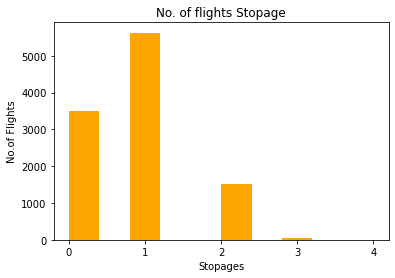

In [159]:
plt.title('No. of flights Stopage')
plt.hist(df['Total_Stops'],color='orange')
plt.xlabel('Stopages')
plt.ylabel('No.of Flights')
plt.xticks (df['Total_Stops'].unique())
plt.show

## Number of Stops per  Airline Company 

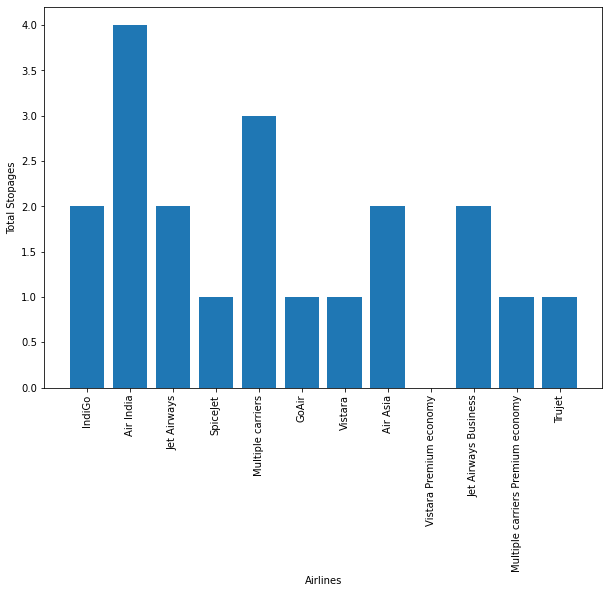

In [172]:
plt.figure(figsize=(10,7))
plt.bar(df['Airline'],df['Total_Stops'])
plt.xlabel('Airlines')
plt.ylabel('Total Stopages')
plt.xticks(rotation=90)
plt.show()

In [161]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [162]:
df[df['Total_Stops']==4]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9182,Air India,2019-01-03,Banglore,New Delhi,BLR → CCU → BBI → HYD → VGA → DEL,2025-03-15 05:50:00,2025-03-02 11:20:00,29h 30m,4,Change airports,17686


In [163]:
df[df['Airline']=='Vistara Premium economy']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
426,Vistara Premium economy,2019-03-03,Banglore,New Delhi,BLR → DEL,2025-03-15 16:00:00,2025-03-15 18:35:00,2h 35m,0,No info,11793
7657,Vistara Premium economy,2019-01-03,Chennai,Kolkata,MAA → CCU,2025-03-15 07:05:00,2025-03-15 09:20:00,2h 15m,0,No info,9125
8615,Vistara Premium economy,2019-06-04,Banglore,Delhi,BLR → DEL,2025-03-15 11:30:00,2025-03-15 14:20:00,2h 50m,0,No info,5969


# Which is the most expensive flight and cheapest flight

In [164]:
a= df.groupby(['Airline'])['Price'].agg(['sum','max']).reset_index().sort_values(by='sum',ascending=False)
a

,Airline,sum,max
4,Jet Airways,44817461,54826
1,Air India,16838841,31945
6,Multiple carriers,13039603,36983
3,IndiGo,11648071,22153
10,Vistara,3734451,21730
8,SpiceJet,3548717,23267
0,Air Asia,1783293,13774
2,GoAir,1137045,22794
5,Jet Airways Business,350152,79512
7,Multiple carriers Premium economy,148445,14629


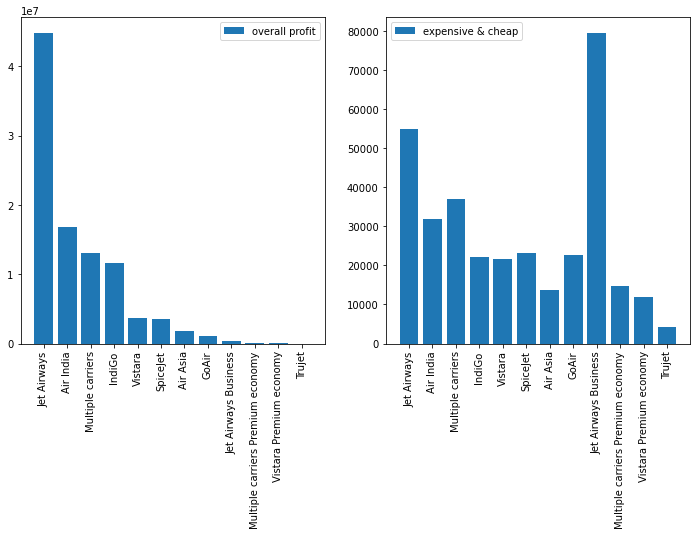

In [165]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.bar(a['Airline'],a['sum'],label='overall profit')
plt.xticks(rotation=90)
plt.legend()


plt.subplot(1,2,2)
plt.bar(a['Airline'],a['max'],label='expensive & cheap')
plt.xticks(rotation=90)
plt.legend()
plt.show()

## Variation in flight price from scource of Airline

In [166]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [167]:
df.replace({'New Delhi' : 'Delhi'}, inplace= True)

In [168]:
df['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [173]:
i=df.groupby(['Source','Destination']) ['Price'].sum().reset_index()
i

,Source,Destination,Price
0,Banglore,Delhi,17614369
1,Chennai,Kolkata,1824949
2,Delhi,Cochin,47817435
3,Kolkata,Banglore,26293736
4,Mumbai,Hyderabad,3526617


In [170]:
import seaborn as sns

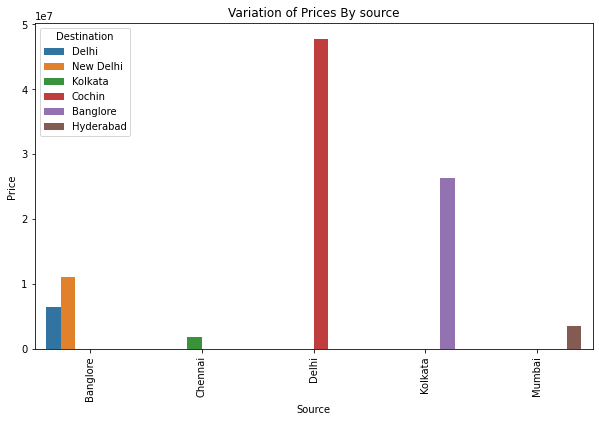

In [197]:
plt.figure(figsize=(10,6))
sns.barplot(x='Source', y= 'Price', hue='Destination', data=sd)
plt.xticks(rotation=90,size= 10)
plt.title('Variation of Prices By source')
plt.show()

In [175]:
df['Date_of_Journey'].unique()

array(['2019-03-24T00:00:00.000000000', '2019-01-05T00:00:00.000000000',
       '2019-09-06T00:00:00.000000000', '2019-12-05T00:00:00.000000000',
       '2019-01-03T00:00:00.000000000', '2019-06-24T00:00:00.000000000',
       '2019-12-03T00:00:00.000000000', '2019-05-27T00:00:00.000000000',
       '2019-01-06T00:00:00.000000000', '2019-04-18T00:00:00.000000000',
       '2019-09-05T00:00:00.000000000', '2019-04-24T00:00:00.000000000',
       '2019-03-03T00:00:00.000000000', '2019-04-15T00:00:00.000000000',
       '2019-12-06T00:00:00.000000000', '2019-06-03T00:00:00.000000000',
       '2019-03-21T00:00:00.000000000', '2019-03-04T00:00:00.000000000',
       '2019-06-05T00:00:00.000000000', '2019-05-15T00:00:00.000000000',
       '2019-06-18T00:00:00.000000000', '2019-06-15T00:00:00.000000000',
       '2019-06-04T00:00:00.000000000', '2019-05-18T00:00:00.000000000',
       '2019-06-27T00:00:00.000000000', '2019-05-21T00:00:00.000000000',
       '2019-03-06T00:00:00.000000000', '2019-03-15

## Extracting Journey Day and Month

In [210]:
df['Day_of_Journey']=df['Date_of_Journey'].dt.day
df['Month_of_Journey']=df['Date_of_Journey'].dt.month



In [211]:
df.head(3)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,2025-03-15 22:20:00,2025-03-22 01:10:00,2h 50m,0,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-03-15 05:50:00,2025-03-15 13:15:00,7h 25m,2,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2025-03-15 09:25:00,2025-06-10 04:25:00,19h,2,No info,13882,6,9


In [212]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.
df.drop(columns=['Date_of_Journey'],inplace=True)

In [213]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,Banglore,Delhi,BLR → DEL,2025-03-15 22:20:00,2025-03-22 01:10:00,2h 50m,0,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-03-15 05:50:00,2025-03-15 13:15:00,7h 25m,2,No info,7662,5,1


### Which Month has maximum Flights

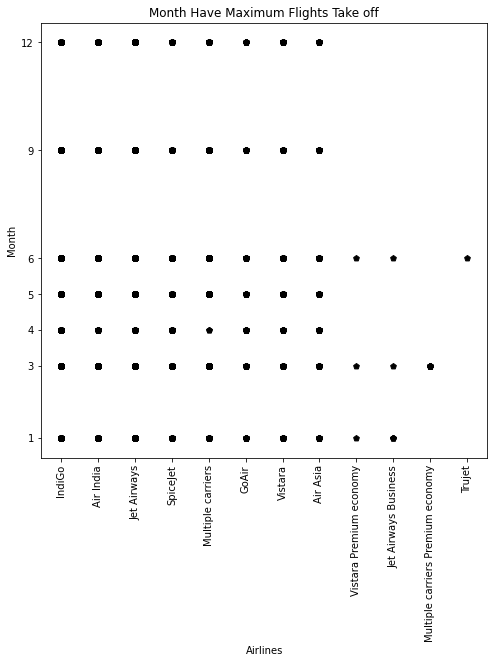

In [183]:
plt.figure(figsize=(8,8))
month=list(df['Month_of_Journey'])
airline=list(df['Airline'])
plt.scatter(airline,month,marker='p',color='k')
plt.xticks(rotation=90)
plt.yticks(df['Month_of_Journey'].unique())
plt.title('Month Have Maximum Flights Take off')
plt.xlabel('Airlines')
plt.ylabel('Month')
plt.show()

In [184]:
df[df['Month_of_Journey']==10]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey


### Which month has the maximum earning

In [186]:
p=df.groupby(['Month_of_Journey'])['Price'].agg(['sum']).reset_index()
p

,Month_of_Journey,sum
0,1,11279591
1,3,18647220
2,4,2217885
3,5,19414875
4,6,23369151
5,9,13429373
6,12,8719011


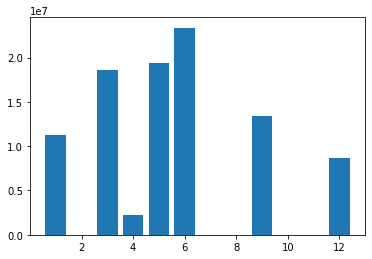

In [187]:
plt.bar(p['Month_of_Journey'],p['sum']);

In [188]:
#prices
z=df.groupby(['Month_of_Journey'])['Price'].agg(['sum']).iloc[:,0]
z=list(z)
z

[11279591, 18647220, 2217885, 19414875, 23369151, 13429373, 8719011]

In [189]:
#Month
a=df.groupby(['Month_of_Journey'])['Price'].agg(['sum']).index
# a = list(a)
a

Int64Index([1, 3, 4, 5, 6, 9, 12], dtype='int64', name='Month_of_Journey')

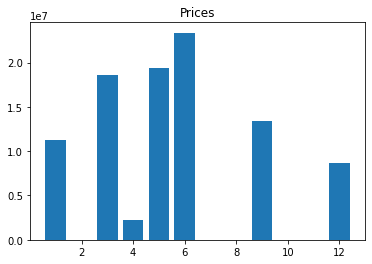

In [190]:
plt.bar(a,z)
plt.title('Prices')
plt.show()

In [191]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

# checking the availablity of flight with respect to 
##source and destination

In [194]:
df1=df.groupby(['Destination','Source'])['Airline'].value_counts()

In [195]:
df1

Destination  Source    Airline                          
Banglore     Kolkata   Jet Airways                          1256
                       Air India                             512
                       IndiGo                                445
                       SpiceJet                              300
                       Vistara                               183
                       Air Asia                              150
                       GoAir                                  25
Cochin       Delhi     Jet Airways                          1586
                       Multiple carriers                    1196
                       Air India                             747
                       IndiGo                                705
                       SpiceJet                               87
                       Air Asia                               80
                       GoAir                                  76
                       Vistara   